Zachary Proom

EN.605.646.81: Natural Language Processing

# Lab #4

## a

In [3]:
import re

# Define the tokenizer function.
def tokenize_text(input):
    """        
    Parameters
    ----------
    input : str
        The input text that gets tokenized.
    
    Returns
    -------
    An ordered list of normalized tokens.
    """
    
    # Add whitespace around punctuation. Exclude periods and hyphens for now
    # because they require extra care.
    input_nopunct = re.sub("(\.\.\.)", r" \1 ", input) # Ellipsis
    input_nopunct = re.sub("([^\w\d\.-])", r" \1 ", input_nopunct)

    # Add whitespace around a period only when it's at the end of a sentence.
    # To detect this, check if the following conditions are true:
    #     (1) There is whitespace after the period.
    #     (2) The period is at the end of a line.
    #     (3) There is a lowercase letter before the period, and an uppercase
    #         letter after the period.
    # In cases (1) and (2), the period cannot be preceded by a period because
    # it would be part of an ellipsis.
    input_nopunct = re.sub("(?<![\.])(\.)\s", r" \1 ", input_nopunct)
    input_nopunct = re.sub("(?<![\.])(\.)$", r" \1 ", input_nopunct)
    input_nopunct = re.sub("([a-z])(\.)([A-Z])", r"\1 \2 \3", input_nopunct)

    # Add whitespace around a hyphen except when it's used between letters 
    # (e.g. so-called).
    input_nopunct = re.sub(r'(?<![a-zA-Z])-(?![a-zA-Z])', ' - ', input_nopunct)
    
    # Lower-case all the words in the input text.
    input_lowercase = input_nopunct.lower()
    
    # Split all the words by whitespace.
    input_wssplit = input_lowercase.split()
    
    return input_wssplit

In [4]:
# Test the tokenizer function on the example sentence in the prompt.
tokenize_text("NAC has developed a National HIV/AIDS/STI/TB Intervention Strategic Plan (2002-2005) that aims to reduce the HIV prevalence rate among Zambians from 19.3% to 11.7% and improve the health status of people living with HIV/AIDS by 2005.")

['nac',
 'has',
 'developed',
 'a',
 'national',
 'hiv',
 '/',
 'aids',
 '/',
 'sti',
 '/',
 'tb',
 'intervention',
 'strategic',
 'plan',
 '(',
 '2002',
 '-',
 '2005',
 ')',
 'that',
 'aims',
 'to',
 'reduce',
 'the',
 'hiv',
 'prevalence',
 'rate',
 'among',
 'zambians',
 'from',
 '19.3',
 '%',
 'to',
 '11.7',
 '%',
 'and',
 'improve',
 'the',
 'health',
 'status',
 'of',
 'people',
 'living',
 'with',
 'hiv',
 '/',
 'aids',
 'by',
 '2005',
 '.']

I define a function above called tokenize_text(). It uses the re module to pad punctuation characters with spaces, so the string can be split on spaces. Before being split, the string is also converted to lowercase. The function adds whitespace around all punctuation, and it handles periods and hyphens with extra care. In particular, the function tries to only add whitespace around periods when it's at the end of a sentence. It also only tries to add whitespace around hyphens when they aren't between letters.

As you can see above, the function works on the test sentence. In my first attempt, I did not think about splitting around ellipses. I noticed my function didn't split ellipses on the first ten lines in tokens.txt, and I added more code to my function to handle them. I also didn't think about typos where there's no space between the last letter of a sentence and the first letter of the proceeding sentence (e.g. "ham.I do"). I had to add condition (3) in my function to deal with this correctly. My function still has trouble handling some less common initialisms like "U.S. of A". I'm unsure whether my tokenizer function should split contractions like "they're". Currently, it splits on the apostrophe.

Below I show the result of processing the first ten lines of tokens.txt.

In [5]:
with open("tokens.txt") as file:
    for i in range(10):
        line = next(file).strip()
        print(tokenize_text(line))

['russian', 'for', 'plastic', 'bag', 'is', 'полиэтиленовый', 'пакет', '.', '7.3', 'out', 'of', '10', 'statistics', 'is', 'made', 'up', '.', 'i', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham', '.', 'i', 'do']
['not', 'like', 'them', 'sam-i-am', '.', 'dr', '.', 'mulholland', 'lives', 'on', 'mulholland', 'dr', '.', 'in', 'hollywood', '.', '1', ',', '2', ',', '3', '...', 'slashdot.com', 'has', 'some', 'interesting']
['articles', '.', 'i', "'", 'm', 'going', 'to', 'update', 'my', 'resumé', '.', 'j.h.u', '.', 'has', 'a', 'great', 'la-crosse', 'team', '.', 'born', 'in', 'the', 'u.s', '.', 'of', 'a', '.', 'incorrect', 'plurala', 'can', 'be']
['fun', '.', 'is', 'capitalization', '(', 'sp', '?', ')', 'truly', 'necessary', '?', 'i', 'think', 'lower', 'case', 'is', 'more', 'legible', '.', 'when', 'people', 'write', 'in', 'all', 'caps', ',', 'it', 'feels']
['like', 'they', "'", 're', 'yelling', '!', 'it', 'is', 'precisely', 'to', 'these', 'substances', 'that', 'the', 'so-called', 'french', 'pa

## b

In [6]:
summary_info = {
    "n_lines": 0,
    "unique_tokens": set(),
    "vocab_size": 0,
    "collection_size": 0,
    "unique_token_counts": dict()
}

# Process all the lines in the text file.
with open("tokens.txt") as file:
    for line in file:
        summary_info["n_lines"] += 1
        result = tokenize_text(line)
        [summary_info["unique_tokens"].add(i) for i in result]
        summary_info["collection_size"] = summary_info["collection_size"] + len(result)
        for token in result:
            if token in summary_info["unique_token_counts"]:
                summary_info["unique_token_counts"][token] = summary_info["unique_token_counts"].get(token, 0) + 1 
            if token not in summary_info["unique_token_counts"]:
                summary_info["unique_token_counts"][token] = 1
    
summary_info["vocab_size"] = len(summary_info["unique_tokens"])

In [7]:
# Report number of lines processed.
print(summary_info["n_lines"])

# Report number of unique tokens.
print(summary_info["vocab_size"])

# Report collection size
print(summary_info["collection_size"])

944802
344521
23432250


In [8]:
# Sort the counts.
summary_info["unique_token_counts"] = dict(sorted(summary_info["unique_token_counts"].items(), key=lambda item: item[1], reverse = True))

# Find the most frequent types.
ranks_1_100 = {k: summary_info["unique_token_counts"][k] for k in list(summary_info["unique_token_counts"])[:100]}
rank_500_key = list(summary_info["unique_token_counts"].keys())[500]
rank_1000_key = list(summary_info["unique_token_counts"].keys())[1000]
rank_5000_key = list(summary_info["unique_token_counts"].keys())[5000]
rank_10000_key = list(summary_info["unique_token_counts"].keys())[10000]

rank_500_val = summary_info["unique_token_counts"][rank_500_key]
rank_1000_val = summary_info["unique_token_counts"][rank_1000_key]
rank_5000_val = summary_info["unique_token_counts"][rank_5000_key]
rank_10000_val = summary_info["unique_token_counts"][rank_10000_key]

rank_500 = dict()
rank_1000 = dict()
rank_5000 = dict()
rank_10000 = dict()

rank_500[rank_500_key] = rank_500_val
rank_1000[rank_1000_key] = rank_1000_val
rank_5000[rank_5000_key] = rank_5000_val
rank_10000[rank_10000_key] = rank_10000_val

In [9]:
# Report the most frequent types.
print(ranks_1_100)
print(rank_500)
print(rank_1000)
print(rank_5000)
print(rank_10000)

{'the': 1154788, '.': 1049089, ',': 1027875, 'to': 564440, 'and': 534802, 'of': 487282, 'a': 455057, 'in': 390653, 'for': 214839, 'that': 203046, 'is': 202438, 's': 187993, '’': 187233, 'on': 164662, 'it': 156335, 'with': 149567, "'": 141226, 'was': 130719, 'at': 127865, '"': 126344, 'i': 117749, 'as': 113449, 'be': 107919, '“': 106826, 'he': 104806, '”': 102222, 'are': 101822, 'said': 94457, 'this': 92847, ':': 92800, 'we': 91866, 'have': 91076, 'from': 89899, 'by': 88317, 'will': 80899, 'you': 80481, 'they': 76653, 'has': 73793, 'but': 71078, 'not': 69961, 'an': 68283, 'his': 67887, 'their': 60158, 'or': 56686, '-': 54567, 't': 52885, 'who': 52176, 'more': 49498, 'one': 48891, 'all': 48833, ')': 46853, 'she': 46822, '(': 46809, 'about': 45767, 'there': 45686, 'can': 44820, 'were': 44501, 'had': 43002, 'been': 42080, 'our': 40601, 'up': 40236, 'her': 39896, 'when': 39866, 'also': 39448, 'out': 39265, 'people': 38390, 'would': 37923, 'new': 36832, 'if': 36764, 'what': 36477, 'which': 3

In [10]:
# Find the number of singletons.
n_singletons = 0
for val in summary_info["unique_token_counts"].values():
    if val == 1:
        n_singletons += 1

# Report the number of tokens that occur once (singletons).
print(n_singletons)

198077


In [11]:
# Report the the percentage of the vocabulary that singletons constitute.
print(100*n_singletons/summary_info["vocab_size"])

57.49344742410477


## c

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert summary_info["unique_token_counts"] to a data frame.
token_counts_df = pd.DataFrame(summary_info["unique_token_counts"].items(), columns=['token', 'freq'])

# Add rank and log transformation columns.
token_counts_df["rank"] = token_counts_df.index + 1
token_counts_df["log_freq"] = np.log(token_counts_df["freq"])
token_counts_df["log_rank"] = np.log(token_counts_df["rank"])

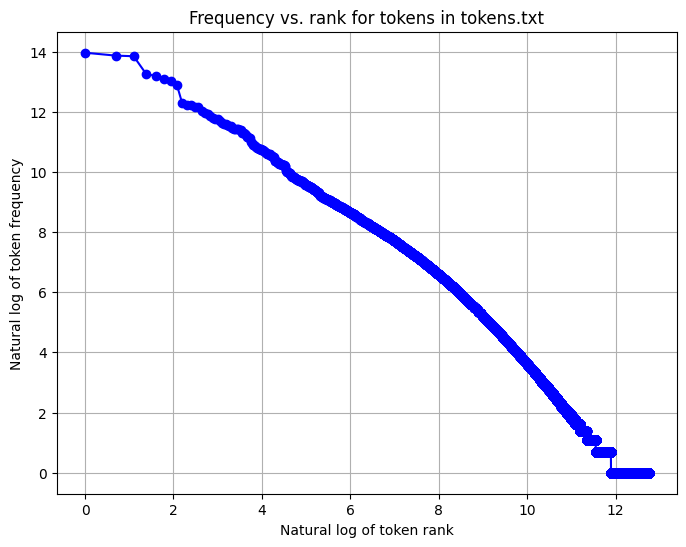

In [13]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(token_counts_df["log_rank"], token_counts_df["log_freq"], marker='o', linestyle='-', color='b', label='Line 1')
plt.title("Frequency vs. rank for tokens in tokens.txt")
plt.xlabel("Natural log of token rank")
plt.ylabel("Natural log of token frequency")
plt.grid(True)
plt.show()

The plotted data follow Zipf's law. If Zipf's law holds, then we would expect to observe the following relationship (k is some constant):

freq * rank = k

log(freq * rank) = log(k)

log(freq) + log(rank) = log(k)

log(freq) = log(k) - log(rank)

The plot appears to show this relationship, where log(k) is approximately 14, or, in other words, k is approximately e^14 (1202604.28).

## d

In [14]:
# Define a sentence boundary detection function.
def detect_sentence_boundary(input):
    """        
    Parameters
    ----------
    input : str
        The input text that gets checked.
    
    Returns
    -------
    A string containing a few numbers (enclosed in angle brackets):
        The first number is the number of sentences that were found.
        The next numbers are character offsets where punctuation characters are found.
        The last number is the offset where the final character is found.
    """

    # Replace non-punctuation periods with whitespace so they aren't caught below.
    # Replace . with whitespace in the following situations:
    #     (1) The period is between two numbers.
    #     (2) The period is part of an initialism (between two uppercase letters).
    #     (3) The period is part of a title (e.g. Mr.). 
    input_periodrepl = re.sub("([0-9])(\.)([0-9])", r"\1 \3", input)
    input_periodrepl = re.sub("([A-Z])(\.)([A-Z])", r"\1 \3", input_periodrepl)
    input_periodrepl = re.sub("(Mr|Mrs|Ms|Dr)(\.)", r"\1 ", input_periodrepl)
    
    # Replace ! after Yahoo with whitespace.
    input_exclrepl = re.sub("Yahoo!", "Yahoo ", input_periodrepl)
    
    # Find the offsets of all punctuation characters.
    punc_matches = re.finditer("[\.?!]", input_exclrepl)
    punc_offsets = [punc_matches.start() for punc_matches in punc_matches]
    n_sentences = len(punc_offsets)

    # Find offset of the last character. 
    punc_offsets.append(len(input)-1)

    # Convert to a set to avoid duplication when last character is a punctuation character.
    punc_offsets_set = set(punc_offsets)

    # If the last character is not a punctuation character, increment n_sentences.
    if input[len(input)-1] != "!" and input[len(input)-1] != "." and input[len(input)-1] != "?":
        n_sentences += 1
    punc_offsets_list = list(punc_offsets_set)
    punc_offsets_list.sort()
    punc_offsets_list.insert(0, n_sentences)

    # Convert to string.
    return " ".join(str(i) for i in punc_offsets_list)

In [15]:
detect_sentence_boundary("I came. I saw! I conquered")

'3 6 13 25'

In [16]:
n_lines = 0

# Apply the function to each line of the output file.
with open("sentences.txt") as file_input:
    with open("JHEDID.txt", "w") as file_output:
        for line in file_input:
            n_lines += 1
            result = detect_sentence_boundary(line)
            file_output.write(result + "\n")

# Pick ten random lines.
np.random.seed(1) # Set seed for reproducibility.
random_line_nos = np.random.randint(0, n_lines, size=10)
i = 0
random_lines = []
with open("sentences.txt") as file_input:
    for line in file_input:
        i += 1
        if i in random_line_nos:
            print("Actual Sentence:")
            print(line)
            print("Results from sentence boundary function:")
            print(detect_sentence_boundary(line))
            print("")


Actual Sentence:
They're hoping this week's snowstorms don't mess up their Saturday wedding. The economic powerhouse is gearing up for nearly three-quarters of a million applicants this year. Tunisia, birthplace of the Arab Spring, has seen a surge in radical Islam since veteran president Zine El Abidine Ben Ali was ousted in the 2011 revolution.

Results from sentence boundary function:
4 74 173 330 331

Actual Sentence:
However, a Russian TV channel late on Saturday quoted the wife of the co-pilot as saying her husband had complained about the plane's condition.

Results from sentence boundary function:
2 143 144

Actual Sentence:
Credit: Paul Michael Hughes/Guinness World Records Tallest married couple Sun Mingming, 33, and his wife Xu Yan, 29, of China have a combined height of 13 feet 10.72 inches. NADINE ANGERER, Germany: The goalkeeper says she’ll retire from the game later this year, but first she wants to lead her country to its third World Cup championship.

Results from sent

I chose ten random sample sentences in sentences.txt above. My function seems to overestimate the number of sentences each time, sometimes by a lot. Strangely, the function didn't overestimate the number of sentences when I stored a line as a string outside of the text file. 


## e

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Compare nltk's word_tokenize() with tokenize_text() on ten random lines in tokens.txt. Use random_line_nos
# from part d.
i = 0
with open("tokens.txt") as file:
    for line in file:
        i += 1
        if i in random_line_nos:
            print("Actual Sentence:")
            print(line)
            print("Results from tokenize_text():")
            print(tokenize_text(line))
            print("Results from word_tokenize():")
            print(word_tokenize(line))
            print("")

Actual Sentence:
Other dark colors like black and gray symbolize dullness, gloom, and the Puritan way of living. What to know before yo go

Results from tokenize_text():
['other', 'dark', 'colors', 'like', 'black', 'and', 'gray', 'symbolize', 'dullness', ',', 'gloom', ',', 'and', 'the', 'puritan', 'way', 'of', 'living', '.', 'what', 'to', 'know', 'before', 'yo', 'go']
Results from word_tokenize():
['Other', 'dark', 'colors', 'like', 'black', 'and', 'gray', 'symbolize', 'dullness', ',', 'gloom', ',', 'and', 'the', 'Puritan', 'way', 'of', 'living', '.', 'What', 'to', 'know', 'before', 'yo', 'go']

Actual Sentence:
a double and nine runs scored. The last time Jones played in University of Phoenix Stadium, he won Super Bowl XLIX and was

Results from tokenize_text():
['a', 'double', 'and', 'nine', 'runs', 'scored', '.', 'the', 'last', 'time', 'jones', 'played', 'in', 'university', 'of', 'phoenix', 'stadium', ',', 'he', 'won', 'super', 'bowl', 'xlix', 'and', 'was']
Results from word_tokeniz

Looking at the random lines above, NLTK's word_tokenize() function keeps capitalization (e.g. first word in sentence), whereas my word tokenizer function converts everything to lowercase. Another big difference is that NLTK keeps some contractions together (e.g. "n't") in fifth sentence, whereas my function splits on the apostrophe and keeps the apostrophe separate. NLTK also splits "cannot" into "can" and "not", whereas my function keeps "cannot" as a single token (see sentence 7). NLTK also keeps times as a single token (e.g. "8:32"), whereas my function splits on ":" (see sentence 9).

In [24]:
# I modify my detect_sentence_boundary() function to produce a list of sentences so it's easier to compare with NLTK's 
# sent_tokenize() function.
def detect_sentence_boundary_mod(input):
    """        
    Parameters
    ----------
    input : str
        The input text that gets checked.
    
    Returns
    -------
    A string containing a few numbers (enclosed in angle brackets):
        The first number is the number of sentences that were found.
        The next numbers are character offsets where punctuation characters are found.
        The last number is the offset where the final character is found.
    """

    # Replace non-punctuation periods with whitespace so they aren't caught below.
    # Replace . with whitespace in the following situations:
    #     (1) The period is between two numbers.
    #     (2) The period is part of an initialism (between two uppercase letters).
    #     (3) The period is part of a title (e.g. Mr.). 
    input_periodrepl = re.sub("([0-9])(\.)([0-9])", r"\1 \3", input)
    input_periodrepl = re.sub("([A-Z])(\.)([A-Z])", r"\1 \3", input_periodrepl)
    input_periodrepl = re.sub("(Mr|Mrs|Ms|Dr)(\.)", r"\1 ", input_periodrepl)
    
    # Replace ! after Yahoo with whitespace.
    input_exclrepl = re.sub("Yahoo!", "Yahoo ", input_periodrepl)
    
    # Find the offsets of all punctuation characters.
    punc_matches = re.finditer("[\.?!]", input_exclrepl)
    punc_offsets = [punc_matches.start() for punc_matches in punc_matches]
    n_sentences = len(punc_offsets)

    # Split on punctuation characters and return a list of sentences.
    sentences = []
    prev_offset = 0
    
    for offset in punc_offsets:
        sentences.append(input[prev_offset:offset])
        prev_offset = offset
    
    # Append the final sentence.
    sentences.append(input[prev_offset:])
    
    return sentences
    
# Compare nltk's sent_tokenize() with detect_sentence_boundary() on ten random lines in sentences.txt. Use random_line_nos
# from part d.
i = 0
with open("sentences.txt") as file:
    for line in file:
        i += 1
        if i in random_line_nos:
            print("Actual Sentence:")
            print(line)
            print("Results from detect_sentence_boundary():")
            print(detect_sentence_boundary_mod(line))
            print("Results from sent_tokenize():")
            print(sent_tokenize(line))
            print("")

Actual Sentence:
They're hoping this week's snowstorms don't mess up their Saturday wedding. The economic powerhouse is gearing up for nearly three-quarters of a million applicants this year. Tunisia, birthplace of the Arab Spring, has seen a surge in radical Islam since veteran president Zine El Abidine Ben Ali was ousted in the 2011 revolution.

Results from detect_sentence_boundary():
["They're hoping this week's snowstorms don't mess up their Saturday wedding", '. The economic powerhouse is gearing up for nearly three-quarters of a million applicants this year', '. Tunisia, birthplace of the Arab Spring, has seen a surge in radical Islam since veteran president Zine El Abidine Ben Ali was ousted in the 2011 revolution', '.\n']
Results from sent_tokenize():
["They're hoping this week's snowstorms don't mess up their Saturday wedding.", 'The economic powerhouse is gearing up for nearly three-quarters of a million applicants this year.', 'Tunisia, birthplace of the Arab Spring, has se

I use the same ten random line numbers to pull ten random sentences from sentences.txt. The results are faily similar, though my function splits on the final period. I noticed that NLTK's sent_tokenize() associates periods with the string preceding it, whereas my sentence tokenizer associated periods with the string after it. NLTK's approach seems preferable.